In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# Define the function to read and parse the data
def read_data(file_path):
    data = []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split() 
            
            row_dict = {}
            row_dict['Outcome'] = int(parts[0])  
            
            for part in parts[1:]:
                index, value = part.split(':')
                row_dict[index] = float(value)  
            
            data.append(row_dict)
    
    df = pd.DataFrame(data)

    columns = ['Outcome', '1', '2', '3', '4', '5', '6', '7', '8']
    df = df[columns]
    
    df.columns = ['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

    return df

# df = read_data('./diabetes.txt')
df = pd.read_csv("./diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# splitting the data into training, test and validation
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != "Outcome"]
y = df.loc[:, "Outcome"]

# 80% = train, 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Data standardization: Each column has a mean of 0 and a SD of 1.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [4]:
# model building with keras (DenseNet)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create the model
def create_model(input_dim=0, first_nodes=0, second_nodes=0, output_dim=0):
    model = Sequential()
    model.add(Dense(first_nodes, activation='relu', input_dim=input_dim))  
    model.add(Dense(second_nodes, activation='relu'))                 
    model.add(Dense(output_dim, activation='sigmoid'))              
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Experiment 1: MLP with 8-12-8-1

In [123]:
num_runs = 10
epochs = 200
train_accuracy_results01 = []
test_accuracy_results01 = []
# Run the training process for the specified number of runs
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
    # Create a new instance of the model for each run
    model = create_model(input_dim=8, first_nodes=12, second_nodes=8, output_dim=1)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs)
    
    # Evaluate the model on the test set
    scores = model.evaluate(X_train, y_train, verbose=False)
    train_accuracy_results01.append(scores[1] * 100)
    scores = model.evaluate(X_test, y_test, verbose=False)
    test_accuracy_results01.append(scores[1] * 100)

Run 1/10


c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6553 - loss: 1.5856
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - loss: 1.0439 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6264 - loss: 0.8440 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.7309 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 0.7215 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6686 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6637 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 0.6681 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - loss: 0.6408
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 0.6482 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.6353 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6561 - loss: 6.5769
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6430 - loss: 2.0942
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 1.4012 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 1.2535 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5991 - loss: 0.9353 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5500 - loss: 0.8802 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.8368 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5405 - loss: 0.7968 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 0.7610 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.6715 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.6748 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3109 - loss: 21.1355
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4145 - loss: 11.3843 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 4.8574 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 1.8325 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 1.4132 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5897 - loss: 1.2472
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 1.1677 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5894 - loss: 1.1725 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 1.1099 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6144 - loss: 1.0164 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 0.9641 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6412 - loss: 2.8793
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 1.6891 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6253 - loss: 1.4184 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6141 - loss: 1.4669 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - loss: 1.1572 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - loss: 1.1514 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 1.0205 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.8526 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.8911 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.7486 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 0.8136 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6431 - loss: 23.0667
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5720 - loss: 13.2519 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4360 - loss: 7.2439 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4075 - loss: 7.0080 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4299 - loss: 6.2142
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4160 - loss: 5.1202 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4160 - loss: 4.6258
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3777 - loss: 4.2970 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4428 - loss: 3.5341 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4233 - loss: 2.8577 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4095 - loss: 2.6148 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6556 - loss: 4.1097
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 2.5409 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 1.4286 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.8545 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6373 - loss: 0.7543 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.7311 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 0.6986 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6338 - loss: 0.6984 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6707 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.6574 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6511 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3123 - loss: 24.8534
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3567 - loss: 14.9191 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3660 - loss: 8.3741 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3816 - loss: 2.3921 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4925 - loss: 1.2983
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4789 - loss: 0.9762 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4889 - loss: 0.9379 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 0.8483 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 0.8483 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 0.7946 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5920 - loss: 0.7664 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3683 - loss: 12.2523
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4060 - loss: 5.4576 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 2.8981 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5538 - loss: 2.4728 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5150 - loss: 2.1048
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 1.7345 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 1.5054 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 1.4019 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 1.1325 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5741 - loss: 1.0082
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5568 - loss: 1.0378 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5378 - loss: 6.6217 
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 4.2843 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4679 - loss: 3.0410 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 2.6387 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5869 - loss: 1.9526 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5648 - loss: 2.0240 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5549 - loss: 1.1989 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 1.5036 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5752 - loss: 1.1288 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 1.0210 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 0.9754 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6296 - loss: 16.3904
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 8.1886 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5177 - loss: 4.1940 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4769 - loss: 2.3161 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4602 - loss: 1.3861 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 1.0911 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5598 - loss: 0.9587
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5895 - loss: 0.9179 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6204 - loss: 0.8347 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6165 - loss: 0.7493 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6623 - loss: 0.7191
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

train_accuracy_results01 [71.33550643920898, 69.54397559165955, 78.50162982940674, 72.14983701705933, 74.2671012878418, 75.2443015575409, 74.91856813430786, 76.05863213539124, 73.77850413322449, 74.91856813430786]
test_accuracy_results01 [66.23376607894897, 68.83116960525513, 70.1298713684082, 68.18181872367859, 72.72727489471436, 74.02597665786743, 66.88311696052551, 69.48052048683167, 68.83116960525513, 70.1298713684082]
Average Training Accuracy over 10 runs: 74.07%
Average Accuracy over 10 runs: 69.55%
Standard Deviation of Accuracy: 2.28%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(50.72222222222221, 0.5, 'Actual')

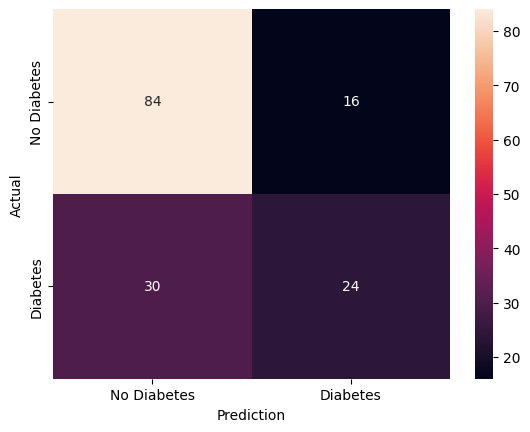

In [126]:

print("train_accuracy_results01", train_accuracy_results01)
print("test_accuracy_results01", test_accuracy_results01)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(test_accuracy_results01)
std_accuracy = np.std(test_accuracy_results01)

print(f"Average Training Accuracy over {num_runs} runs: {np.mean(train_accuracy_results01):.2f}%")
print(f"Average Accuracy over {num_runs} runs: {average_accuracy:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}%")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

cm = confusion_matrix(y_test, predicted_classes)
ax = sns.heatmap(cm, annot=True,
xticklabels=["No Diabetes", "Diabetes"],
yticklabels=["No Diabetes", "Diabetes"])

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

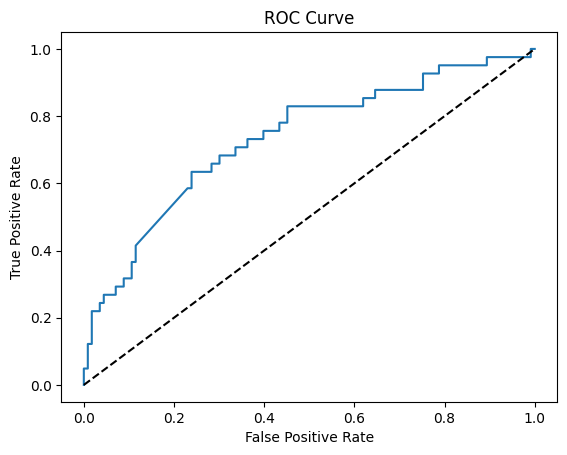

In [89]:
# ROC Curve
FPR, TPR,_ = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Experiment 2: MLP with 8-16-1

In [19]:
num_runs = 10
epochs = 200
train_accuracy_results02 = []
test_accuracy_results02 = []

# Run the training process for the specified number of runs
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
    # Create a new instance of the model for each run
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=8))  
    model.add(Dense(1, activation='sigmoid'))              
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs)
    
    # Evaluate the model on the test set
    scores = model.evaluate(X_train, y_train, verbose=False)
    train_accuracy_results02.append(scores[1] * 100)
    scores = model.evaluate(X_test, y_test, verbose=False)
    test_accuracy_results02.append(scores[1] * 100)

Run 1/10
Epoch 1/200


c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3432 - loss: 9.1381 
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4634 - loss: 5.8269 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 4.5580 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 3.5771 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4656 - loss: 2.7817 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 2.4898  
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 2.0896 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 2.1192 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5093 - loss: 1.8475 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4585 - loss: 1.5937 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5103 - loss: 1.4914 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5362 - loss: 5.7683
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 3.9398 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5298 - loss: 3.1759 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 2.7305 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 2.1831 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 1.8290 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 1.6904 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.4469 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 1.4303 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5934 - loss: 1.3691 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 1.3147 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3665 - loss: 54.5588
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3661 - loss: 42.5916 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2982 - loss: 37.3501 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 - loss: 26.0434 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 18.6553 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 12.7180 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4172 - loss: 8.8877 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4182 - loss: 6.0208 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4329 - loss: 3.6940 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4647 - loss: 2.5824 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 2.4062 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3779 - loss: 12.6041
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3471 - loss: 10.5939 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3687 - loss: 8.4301 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3954 - loss: 6.8561 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4046 - loss: 5.9608 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4146 - loss: 5.9637 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4538 - loss: 5.1770 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 4.2750 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4606 - loss: 3.7419 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: 3.4189 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4637 - loss: 3.0146 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3610 - loss: 17.9898
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4079 - loss: 6.4552 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5274 - loss: 5.0506 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 4.0781 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4944 - loss: 4.0579 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 3.3804 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4981 - loss: 3.0585 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5024 - loss: 2.7891 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 2.2732 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5460 - loss: 1.7500 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.5872 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3397 - loss: 21.9045
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3433 - loss: 14.0950 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3904 - loss: 9.1886 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4671 - loss: 6.5708 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4673 - loss: 4.5282 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4926 - loss: 2.7971 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 1.9498  
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5288 - loss: 2.0228 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5757 - loss: 1.6878 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 1.5168 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5525 - loss: 1.5296 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6546 - loss: 14.1785
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5527 - loss: 7.8230  
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4090 - loss: 5.7454 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4931 - loss: 4.4260 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4928 - loss: 3.6775 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5192 - loss: 3.0410 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - loss: 2.5954  
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 2.3979 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6010 - loss: 2.1401 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5476 - loss: 1.9576 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5521 - loss: 2.0101 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3480 - loss: 40.3405
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 29.0992 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3209 - loss: 19.0878 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3772 - loss: 11.4265 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3909 - loss: 9.5041 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4584 - loss: 6.1589 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 4.4049 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4715 - loss: 3.0261 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 2.2364 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5720 - loss: 2.2120 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 2.0894 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4641 - loss: 4.3152
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 2.5790 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 2.3785 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5869 - loss: 2.3392 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 1.8755 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 1.8967 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5884 - loss: 1.4470 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5832 - loss: 1.5762 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 1.4525 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6456 - loss: 1.2625
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6281 - loss: 1.3047 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4599 - loss: 12.8667
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 10.2586 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4894 - loss: 7.4791  
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5192 - loss: 4.6925 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 2.7837 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3959 - loss: 2.2098 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5658 - loss: 1.5245 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.4814 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5544 - loss: 1.5017 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 1.3982 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5786 - loss: 1.2956  
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

train_accuracy_results02 [75.1527488231659, 77.39307284355164, 70.87576389312744, 77.39307284355164, 76.17108225822449, 78.00407409667969, 73.52342009544373, 75.76375007629395, 77.59674191474915, 72.91242480278015]
test_accuracy_results02 [70.77922224998474, 66.88311696052551, 66.23376607894897, 68.18181872367859, 68.83116960525513, 73.3766257762909, 72.07792401313782, 73.3766257762909, 70.77922224998474, 68.83116960525513]
Average Accuracy over 10 runs: 69.94%
Standard Deviation of Accuracy: 2.41%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(50.72222222222221, 0.5, 'Actual')

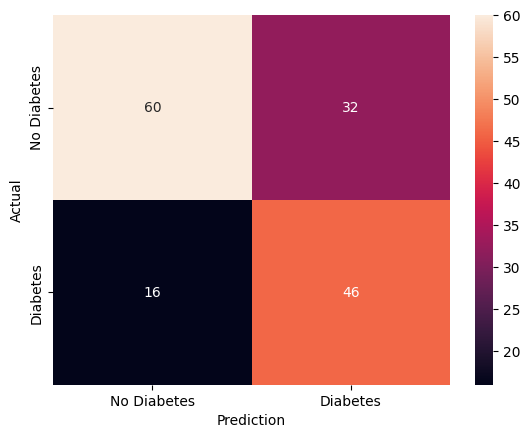

In [20]:
print("train_accuracy_results02", train_accuracy_results02)
print("test_accuracy_results02", test_accuracy_results02)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(test_accuracy_results02)
std_accuracy = np.std(test_accuracy_results02)

print(f"Average Accuracy over {num_runs} runs: {average_accuracy:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}%")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

cm = confusion_matrix(y_test, predicted_classes)
ax = sns.heatmap(cm, annot=True,
xticklabels=["No Diabetes", "Diabetes"],
yticklabels=["No Diabetes", "Diabetes"])

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

AUC Score: 0.7596423562412342


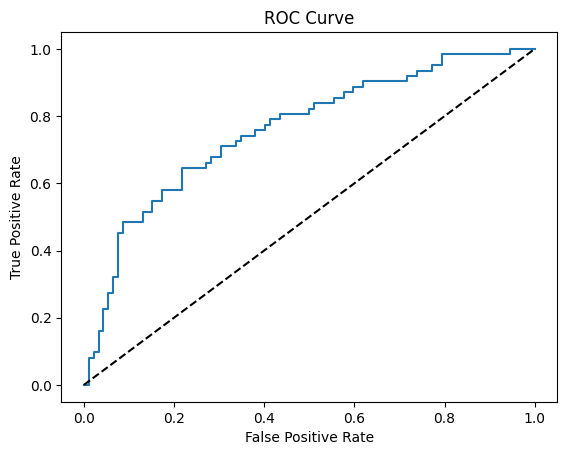

In [21]:
# Calculate AUC score
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, predictions)
print("AUC Score:", auc_score)

# ROC Curve
FPR, TPR,_ = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Experiment 3: MLP with 8-32-16-1

In [91]:
num_runs = 10
epochs = 200
train_accuracy_results04 = []
test_accuracy_results04 = []

# Run the training process for the specified number of runs
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
    # Create a new instance of the model for each run
    model = create_model(input_dim=8, first_nodes=32, second_nodes=16, output_dim=1)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs)
    
    # Evaluate the model on the test set
    scores = model.evaluate(X_train, y_train, verbose=False)
    train_accuracy_results04.append(scores[1] * 100)
    scores = model.evaluate(X_test, y_test, verbose=False)
    test_accuracy_results04.append(scores[1] * 100)

Run 1/10
Epoch 1/200


c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5889 - loss: 3.9858
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 1.9449 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5957 - loss: 1.6499 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5977 - loss: 1.2649 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6214 - loss: 1.1514 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.8499 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6500 - loss: 0.8469 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 0.8199 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.7561 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 0.7284 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - loss: 0.7327 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3847 - loss: 11.1280
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5664 - loss: 2.5827 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 1.5244 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6463 - loss: 1.0224 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - loss: 0.9504 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6555 - loss: 0.8786 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.7846 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - loss: 0.7024 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.6535  
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - loss: 0.6651 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.6107 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5557 - loss: 6.6463 
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4919 - loss: 2.0057 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 1.4393 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5178 - loss: 1.1106 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6193 - loss: 0.8534 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.8228 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.7636 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.7414 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 0.6835 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6726 - loss: 0.6298
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.6385 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4098 - loss: 9.0239 
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5409 - loss: 1.8312 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 1.0219 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - loss: 0.7907 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.7137 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.7147 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 0.5981 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - loss: 0.6171 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 0.6101 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6980 - loss: 0.6171 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7153 - loss: 0.6192
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6299 - loss: 3.2855
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 1.0847 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.9775 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.8700 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.6973 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6605 - loss: 0.7223 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.7130 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.7409 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.7073 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.6238 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - loss: 0.7028 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6491 - loss: 12.5884
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3846 - loss: 4.4864 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5628 - loss: 2.3332 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 1.5244 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 1.0526 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6343 - loss: 0.8482 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.7829 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6214 - loss: 0.8223 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.7254 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.7707 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.7374 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5749 - loss: 2.8657
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 1.2107 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.9735
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.8953 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.8631 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7163 - loss: 0.7653 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - loss: 0.8286 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.7199 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.7344 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6648 - loss: 0.7692 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - loss: 0.8114 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5340 - loss: 2.3821
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 1.2320 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 1.0344 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.8792 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 0.8694 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.7399 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - loss: 0.8252 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 0.7619 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.7520 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - loss: 0.7087 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.7749 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3515 - loss: 25.6564
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5538 - loss: 4.3080 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5853 - loss: 3.6038 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 2.0087 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 1.1104 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.9579 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 0.9241 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6536 - loss: 0.8188 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 0.7712 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6734 - loss: 0.7547 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - loss: 0.6450 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

c:\Users\Wong Hui Ying\OneDrive - University of Adelaide\Y1 Tri3\DL Fundamentals\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5667 - loss: 4.7228
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5203 - loss: 2.1867 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6070 - loss: 1.3721 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 1.1640 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6194 - loss: 0.9492 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - loss: 0.7876 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6043 - loss: 0.8475 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.7629 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.7215 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.6976 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6557 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

train_accuracy_results04 [76.37474536895752, 77.39307284355164, 80.44806718826294, 79.42973375320435, 76.37474536895752, 77.80040502548218, 75.96741318702698, 70.4684317111969, 82.07739591598511, 78.81873846054077]
test_accuracy_results04 [72.72727489471436, 75.32467246055603, 72.07792401313782, 75.97402334213257, 77.27272510528564, 75.97402334213257, 77.92207598686218, 64.9350643157959, 70.1298713684082, 79.22077775001526]
Average Training Accuracy over 10 runs: 77.52%
Average Test Accuracy over 10 runs: 74.16%
Standard Deviation of Accuracy: 4.06%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(50.72222222222221, 0.5, 'Actual')

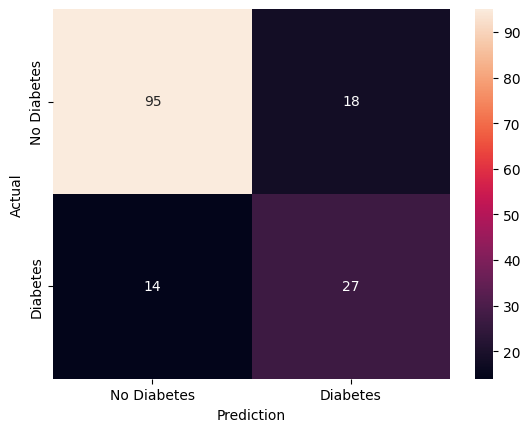

In [94]:

print("train_accuracy_results04", train_accuracy_results04)
print("test_accuracy_results04", test_accuracy_results04)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(test_accuracy_results04)
std_accuracy = np.std(test_accuracy_results04)

print(f"Average Training Accuracy over {num_runs} runs: {np.mean(train_accuracy_results04):.2f}%")
print(f"Average Test Accuracy over {num_runs} runs: {average_accuracy:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}%")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

cm = confusion_matrix(y_test, predicted_classes)
ax = sns.heatmap(cm, annot=True,
xticklabels=["No Diabetes", "Diabetes"],
yticklabels=["No Diabetes", "Diabetes"])

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

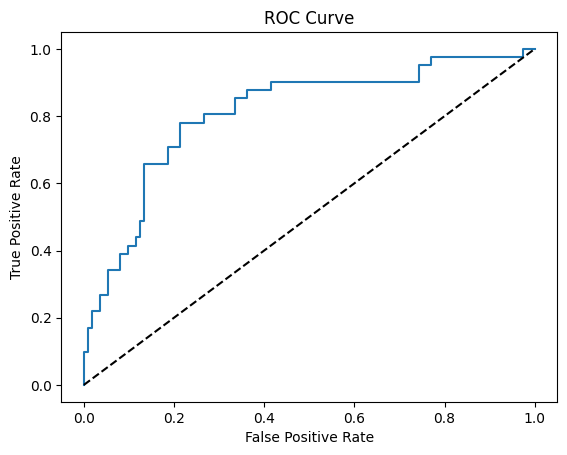

In [93]:
# ROC Curve
FPR, TPR,_ = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Experiment 4: SVM

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv("./diabetes.csv")
X = df.loc[:, df.columns != "Outcome"]
y = df.loc[:, "Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 11)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# model training     
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[10,100,200,300,400,500,600,700,800,900,1000] 
                }
            ]
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )
grid_search.fit(scaled_X_train, y_train)
grid_search.best_estimator_

SVC(C=10, kernel='linear')

Train accuracy score: 0.78
Test accuracy score: 0.78
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                     83                  17
Actual Diabetes                        17                  37


Text(50.72222222222221, 0.5, 'Actual')

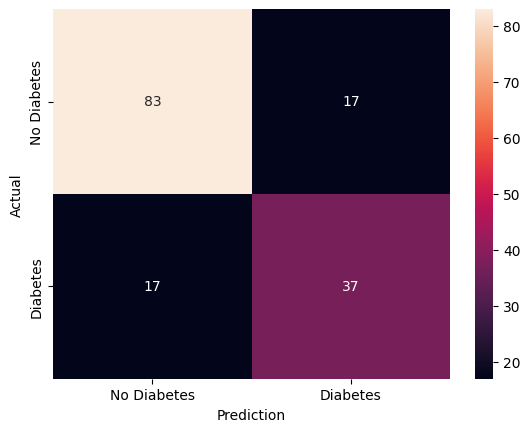

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

svc = SVC(C=10, kernel="linear")
svc.fit(scaled_X_train, y_train)

print("Train accuracy score: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Test accuracy score: {:.2f}".format(svc.score(scaled_X_test, y_test)))

predicted_classes = svc.predict(scaled_X_test)

cm = confusion_matrix(y_test, predicted_classes)
# Convert the confusion matrix into a pandas DataFrame (table format)
cm_table = pd.DataFrame(cm, 
                        index=["Actual No Diabetes", "Actual Diabetes"], 
                        columns=["Predicted No Diabetes", "Predicted Diabetes"])

# Display the confusion matrix in table format
print(cm_table)
ax = sns.heatmap(cm, annot=True,
xticklabels=["No Diabetes", "Diabetes"],
yticklabels=["No Diabetes", "Diabetes"])

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

AUC Score: 0.7575925925925925


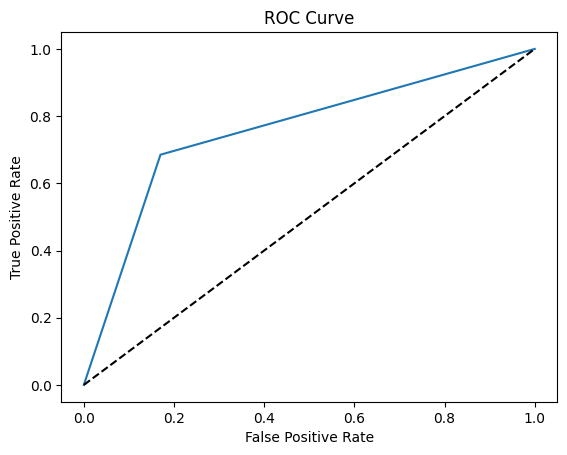

In [9]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, predicted_classes)
print("AUC Score:", auc_score)

# ROC Curve
FPR, TPR,_ = roc_curve(y_test, predicted_classes)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()